# PROJECT TITLE - USED CAR DATA by Muaz Hassan

## INTRODUCTION
The data is about transportation (used car) industry. Data were sourced from Kaggle (https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?select=UserCarData.csv). The data contains about 7,906 used cars of different transmission, owner,mileage, brands from different region ranginng from East, Central, West, and South. 



In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected= True)

from PIL import Image
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import warnings
warnings.filterwarnings('ignore')

## Preliminary Wrangling

1. Load in your dataset 
2. Checking data structures and missing columns
3. Making sales_id as index 
4. Dropping irrelevant columns




In [2]:
#Loading of data file
used_car = pd.read_csv(r"C:\Users\muazh\OneDrive\Documents\UDACITY\Final project\UserCarData.csv")
used_car.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [3]:
#checking data structures and missing columns
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

In [4]:
#Making sales_id as index 
used_car.set_index('Sales_ID', inplace = True)


In [5]:
#dropping irrelevant columns
used_car.drop(['torque'], axis = 1, inplace = True)

In [6]:
# high-level overview of data shape and composition
print(used_car.shape)
print(used_car.dtypes)
print(used_car.head(10))

(7906, 16)
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
seats                  int64
sold                  object
dtype: object
             name  year  selling_price  km_driven   Region  \
Sales_ID                                                     
1          Maruti  2014         450000     145500     East   
2           Skoda  2014         370000     120000     East   
3           Honda  2006         158000     140000  Central   
4         Hyundai  2010         225000     127000  Central   
5          Maruti  2007         130000     120000     East   
6         Hyundai  2017         440000      45000     East   
7          Maru

In [7]:
# descriptive statistics for numeric variables
print(used_car.describe())

              year  selling_price     km_driven      mileage       engine  \
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000  7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04    19.419861  1458.708829   
std       3.863695   8.135827e+05  5.679230e+04     4.036263   503.893057   
min    1994.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2012.000000   2.700000e+05  3.500000e+04    16.780000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.900000e+05  9.542500e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  7906.000000  7906.000000  
mean     91.587374     5.416393  
std      35.747216     0.959208  
min      32.800000     2.000000  
25%      68.050000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.000000  
max     400.000000    14.000000  


#### What is the structure of your dataset?
There are 7,906 used car in the dataset with 17 features (name,year, selling_price, km_driven,region, city, fuel,transmission etc). Variables are mixed of both categorical and numerical in nature.

#### What is/are the main feature(s) of interest in your dataset?
I'm most interested in figuring out what features affect the selling price of a used car.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that engine, max_power, and mileage to have a strongest effect on used car selling price. Also, I think the fuel type as well as transmission will also have major effect on used car selling price. 

## EXPLORATORY DATA ANALYSIS

I'll start by looking at the distribution of the used car variables by answering the following questions below. This will help to know the distributions, characteristics as well as names of used car before diving deeper into the analysis (i.e, comparing more than one variable)

## Univariate Exploration Plots
1. Top 10 Cities with the most used car using dynamic ordering
2. Most used car mileage range
3. Most used Automobile Transmission 
4. Most common automobile car seller type
5. Proportion of Automobile Dealers 
6. Most Common Car Names
7. Highest car sold per Year






### Top 10 Cities with the most used car using dynamic ordering
#### Visualizing top 10 cities with the highest number of used cars

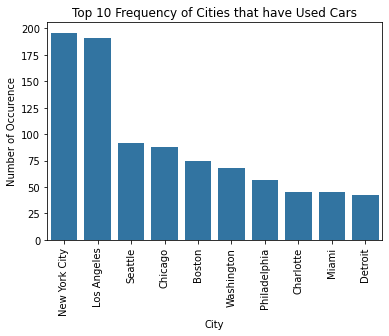

In [8]:
# Top 10 Cities with the most used car using dynamic ordering

base_color = sb.color_palette()[0]
plt.xticks(rotation=90)


sb.countplot(data=used_car, x='City', color=base_color,  order=['New York City','Los Angeles','Seattle','Chicago','Boston'
                                                                      'Washington','Philadelphia',
                                                                'Charlotte ','Miami','Detroit ']);

# Dynamic-ordering the bars
freq = used_car['City'].value_counts()[:10]

# Get the indexes of the Series
city_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of `city`
sb.countplot(data=used_car, x='City', color=base_color, order=city_order);
plt.xlabel('City');
plt.ylabel('Number of Occurence');
plt.title("Top 10 Frequency of Cities that have Used Cars");



From the plot above it can be depicted that the city that has the most used car was New York followed by Los Angeles. These probably represent the distrubution of used car around the country. 

### Most used car mileage range
#### Visulazing all Used cars Mileage range 

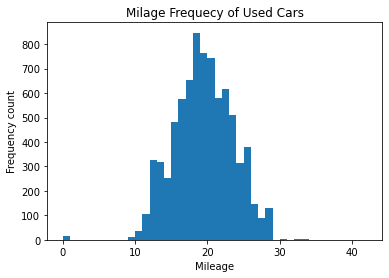

In [9]:
# most used car mileage range
def mileage_distribution():
    fig = plt.figure()
    bins = np.arange(0, used_car['mileage'].max()+1,1)
    plt.hist(data = used_car, x = 'mileage', bins = bins);
    plt.xlabel('Mileage');
    plt.ylabel('Frequency count');
    plt.title("Milage Frequecy of Used Cars");

mileage_distribution()

The mileage of most used cars were within the range of 18km - 20km . This shows that most of the used cars from the country are within that range which means most cars haven't travelled a long distance.

###  Most Used Automobile Transmission
#### Used cars transmission were observed in order to know the numbers of cars with Automobile and Manual

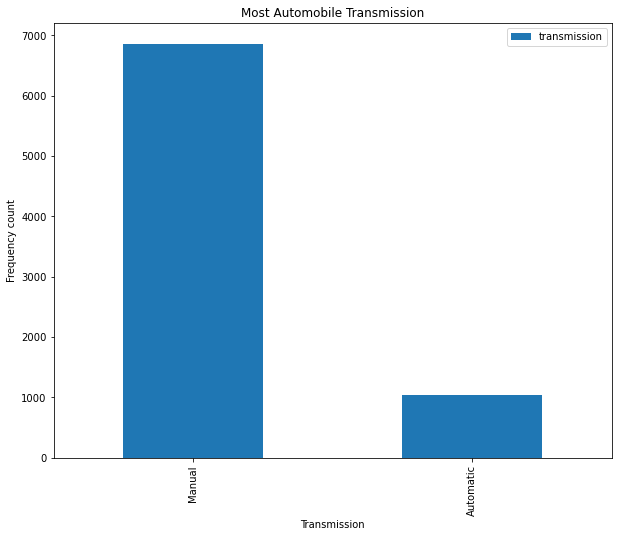

In [10]:
#Most used Automobile Transmission 
def automobile_transmission():
    used_car['transmission'].value_counts().to_frame().plot(kind = 'bar', 
                                                            title ="Most Automobile Transmission",figsize =(10,8))
    plt.xlabel('Transmission')
    plt.ylabel('Frequency count');
automobile_transmission()

In the case of transmission, most used cars in the country have the Manual means of transmission which means most car owners are accustomed to the manual means of transmission than the automatics.

### Most common automobile fuel type
#### Vehicle classifcations based on fuel type were counted to have a general overview of most used cars fuel

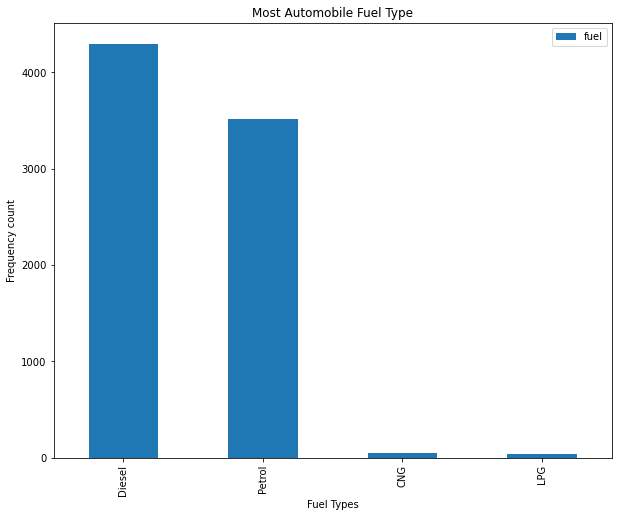

In [11]:
#Most common automobile fuel type
def automobile_fuel():
    used_car['fuel'].value_counts().to_frame().plot(kind = 'bar', 
                                                            title ="Most Automobile Fuel Type",figsize =(10,8))
    plt.xlabel('Fuel Types')
    plt.ylabel('Frequency count')
automobile_fuel()

It can be depicted from the plot above that the means of fuel for most of the used cars are diesel and petrol. This means most of the used car transmission either uses Diesel or Petrol

### Proportion of Automobile Dealers 
#### Counting the numbers of car dealers to know which delears generate the markets more

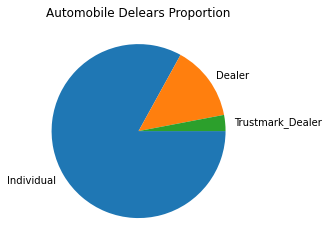

<Figure size 1440x1152 with 0 Axes>

In [12]:
# Proportion of Automobile Dealers 
seller_counts = used_car['seller_type'].value_counts()
plt.pie(seller_counts, labels = seller_counts.index, startangle = 360, counterclock = False);

plt.title("Automobile Delears Proportion");
plt.figure(figsize=(20,16));




Most of used car dealers are individual according to the plot. Which means most used car seller are independent sellers without no intermidiary.

### Most Common Car Names
#### Visualizing Top 10 car brands all over the country 


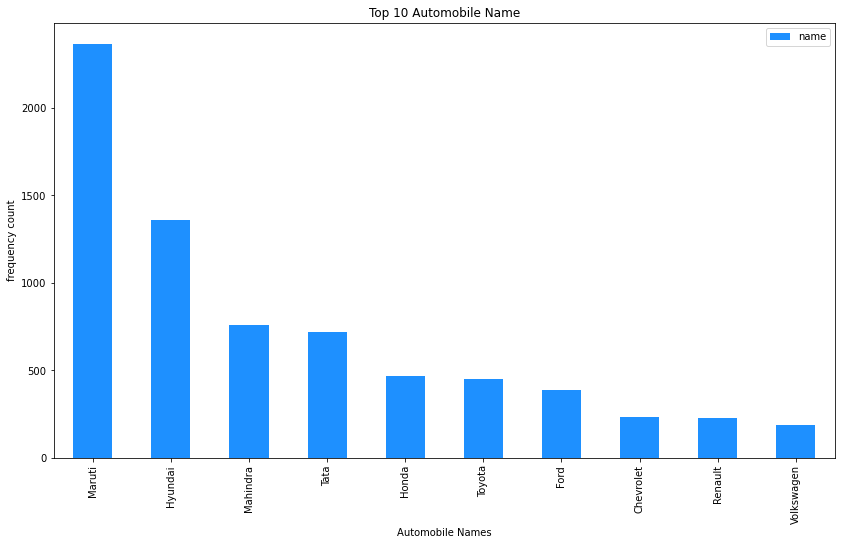

In [13]:
# Most Common Car Names
used_car['name'].value_counts().to_frame()[:10].plot(kind = 'bar', 
                                                          title = "Top 10 Automobile Name",
                                                          color= 'dodgerblue',figsize =(14,8))
plt.xlabel('Automobile Names');
plt.ylabel('frequency count');


The plot shows the most common Top 10 cars. It can be depicted that Maruti followed by Hyundai are the most common car type in the country.

### Year with the highest used car
#### Counting the numbers of Cars used in a year

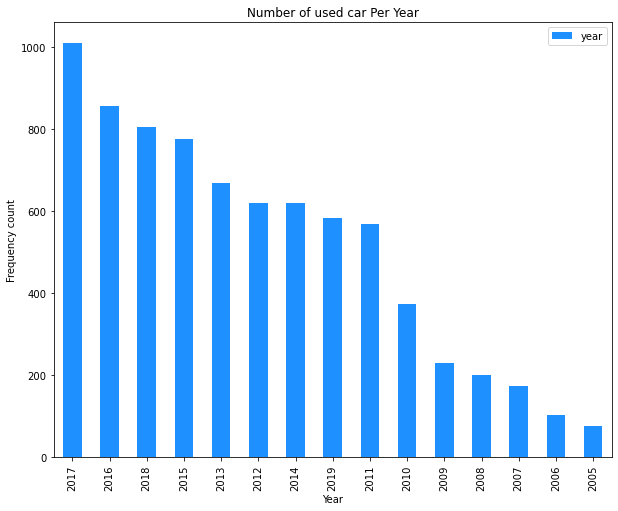

In [14]:
# Year with the highest used car
used_car['year'].value_counts().to_frame()[:15].plot(kind = 'bar', 
                                                          title = "Number of used car Per Year",
                                                          color= 'dodgerblue',figsize =(10,8))
plt.xlabel('Year')
plt.ylabel('Frequency count');


The plot above illustrates the number of used cars in a single year. From the plot 2017, 2016, 2015, and 2018 have the most numbers of used car in a calendar year. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating no unsusual distribution were detected as well as no adjusment were made as the data were clean.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the datset their was no unusual point from the plot generated from the data. Under the transformation, no transformation were done for this part of visualization as count function was mostly used during plots. 



## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data. The following will be looked at during this phase. 

8.  Correlation between mileage and selling price
9.  Relationship between mileage and engine
10. Car Milage Per region
11. Car Transmission versus Selling Price
12. State of cars transmission by region
13. State of cars owners by region
14. State of cars sellers by region
15. Car seat versus car engine
16. Car sold by region
17. Comparing selling prices with 8 years interval










### Correlation between mileage and selling price
#### Checking the relationship between car mileage and price

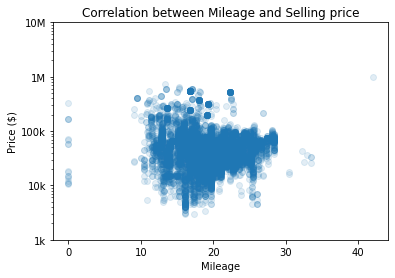

In [15]:
#Correlation between mileage and selling price
plt.scatter(data = used_car, x = 'mileage', y = 'selling_price', alpha = 1/8)
plt.xlabel('Mileage')
#plt.ylabel('Price (dollars)') 
plt.yscale('log')
plt.yticks([10e3, 10e4, 10e5, 10e6, 10e7], ['1k','10k','100k', '1M','10M'])
plt.ylabel('Price ($)')
plt.title("Correlation between Mileage and Selling price");

From the plot, most of the mileage are concentrated within the range of 15-20m with a price range of about 30-100k. 

### Relationship between mileage and engine
#### Looking for relationship between car engine and mileage


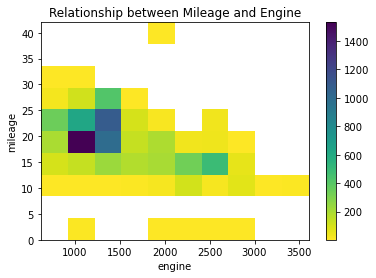

In [16]:
#Relationship between mileage and engine
plt.hist2d(data = used_car, x = 'engine', y = 'mileage', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('engine')
plt.ylabel('mileage');
plt.title("Relationship between Mileage and Engine");

From the Plot above we tend to have a a strong relationship between mileage of 18-25 and engine size of 1000-1500

### Relationship between car mileage and region
#### Looking at the region with the highest car mileage

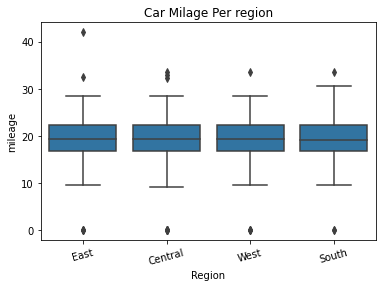

In [17]:
#Car Milage Per region
sb.boxplot(data= used_car, x='Region', y='mileage', color=base_color)
plt.xticks(rotation=15);
plt.title("Car Milage Per region");

The above plots illusrate that car mileage in all region has a minimum of 10km, median of 19km , while the southern region has the highest mileage of about 30km with the remaining region having the maximum mileage of 29km.

###  Car Transmission versus Selling Price
#### Looking for most transmission car sales 

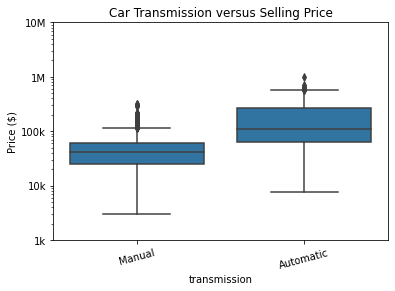

In [18]:
# Car Transmission versus Selling Price
sb.boxplot(data= used_car, x='transmission', y='selling_price', color=base_color)
plt.xticks(rotation=15);
plt.yscale('log')
plt.yticks([10e3, 10e4, 10e5, 10e6, 10e7], ['1k','10k','100k', '1M','10M'])
plt.ylabel('Price ($)')
plt.title("Car Transmission versus Selling Price");

The plot above shows that Automatic transmission is quite expensive where we have the minimum price to be around 8k and maximum price 600k 

### State of cars transmission by region
#### Looking for variation of car transmission by region


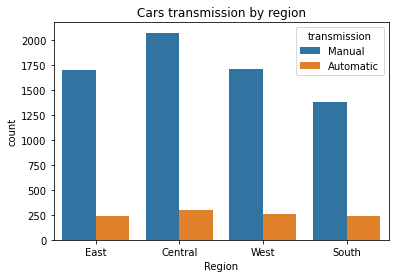

In [19]:
# state of cars transmission by region
transmission_classes = ['Manual', 'Automatic']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= transmission_classes)
used_car['transmission'] = used_car['transmission'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'transmission')
plt.title("Cars transmission by region");


The plot illustrate that Manual type of transmission populated the whole region and was higher at the central region when compared to other regions

### State of cars owners by region


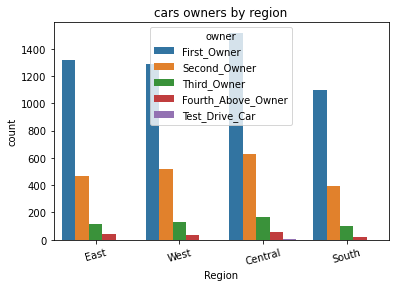

In [20]:
# state of cars owners by region
region_classes = ['East','West','Central','South']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['Region'] = used_car['Region'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'owner')
plt.xticks(rotation = 15);
plt.title("cars owners by region");


The plots above shows that most car owners are first owner in all regions 

#### State of car sellers by region
#### Looking for population of car sellers per region


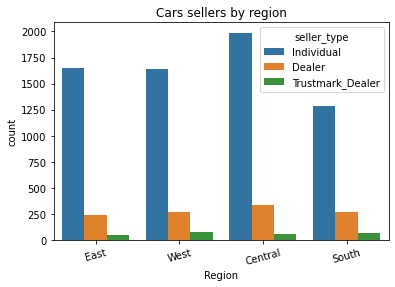

In [21]:
# state of cars sellers by region
region_classes = ['East','West','Central','South']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['Region'] = used_car['Region'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'seller_type')
plt.xticks(rotation = 15);
plt.title("Cars sellers by region");

It can be depicted from the above plot that most used cars sellers across all regions are individual sellers with the highest number of individual sellers in the central region.

### Car seat versus car engine
#### Looking for relationship between number of car seats with car engine


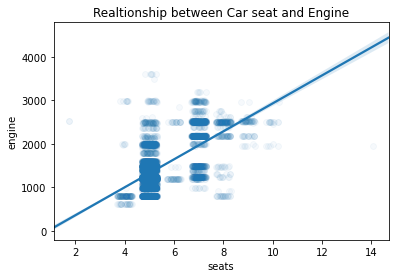

In [43]:
#Car seat versus car engine
sb.regplot(data = used_car, x = 'seats', y = 'engine', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/25});
plt.title("Realtionship between Car seat and Engine");

From the scatter plots, most car seat of 5 tends to have higher engine size while most of the engine size were populated within the range of 1000-2000

#### Car selling price over the years
Looking at how used cars selling prices have varied over the years 

### Car sold by region
#### Looking for the number of car solds by region


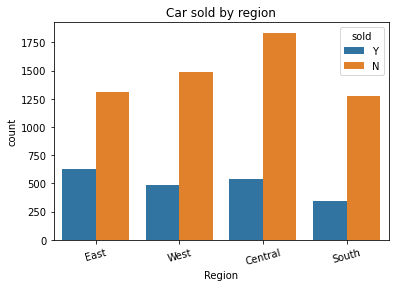

In [23]:
#Car sold by region
region_classes = ['Y','N']
car_region = pd.api.types.CategoricalDtype(ordered=True, categories= region_classes)
used_car['sold'] = used_car['sold'].astype(car_region);
sb.countplot(data = used_car, x = 'Region', hue = 'sold')
plt.xticks(rotation = 15);
plt.title("Car sold by region");


The above plot shows that most cars are still yet to be sold to buyers with the central region having the highest number of unsold cars while the east region has the highest number of sold cars.

### Sum of used cars selling price by Segregated years interval (8 Years Interval)


In [24]:
# Sum of used cars selling price by Segregated years interval
car1_century = used_car.loc[(used_car['year'] <= 2000) & (used_car['year'] >= 1994)]
car2_century = used_car.loc[(used_car['year'] <= 2008) & (used_car['year'] >= 2001)]
car3_century = used_car.loc[(used_car['year'] <= 2017) & (used_car['year'] >= 2009)]



In [25]:
car_94_00 = car1_century['selling_price'].sum()
car_01_08 = car2_century ['selling_price'].sum()
car_09_17 = car3_century ['selling_price'].sum()


### Comparing selling prices 


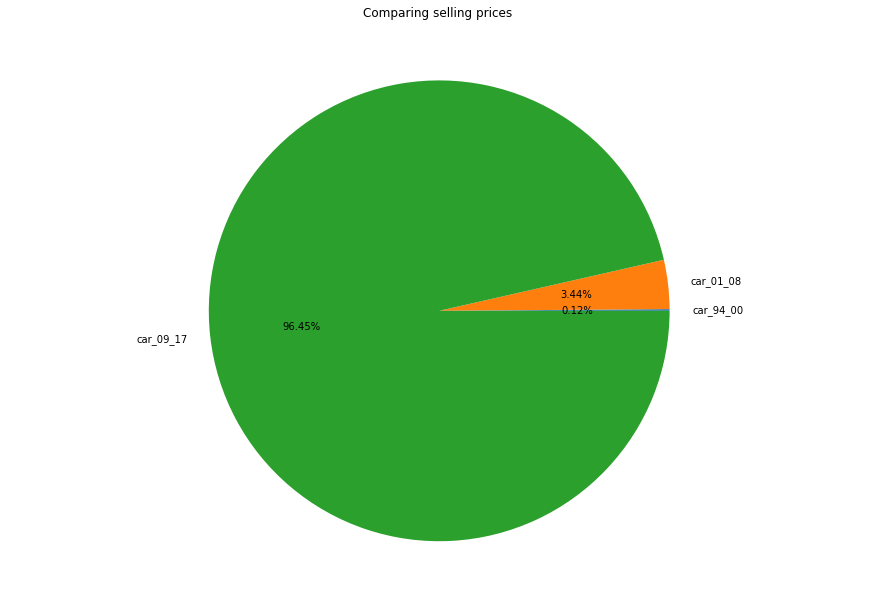

In [26]:
#Comparing selling prices 
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = ['car_94_00','car_01_08','car_09_17']
selling_price_sum = [3800913, 112204648,3147632755]
ax.pie(selling_price_sum, labels = langs,autopct='%1.2f%%')
plt.title("Comparing selling prices ");

plt.show()

The pie chart above illustrate that the year 2009-2017 has the highest sum of selling price after dissecting the years into 8 years interval.

#### Talk about some of the relationships you observed in this part of the investigation. 
Their seems to be some relationship between price and mileage. Most mileage are around 20km while price range falls within 30k-100k. Also strong relationship between mileage and engine size. Relationship between mileage and region were checked to determine the region with the least as well as highest mileage which was observed that across all region the minimum mileage was 10km and a median of around 18-20km. Relationship between transmission over region was looked into and most transmission were manual types. Also, car owner by regions as well as car sellers by region were looked into and most owners were first owner and individual respectively. 

Furthermore, selling price of used car over 8 years interval was sum up to determine which year interval has the highest selling price. 

#### Did you need to perform any transformations?

Under the transformation, transformation were done for this part of visualization that has prices as it y axis where it was changed from log format to a real price range.

## Multivariate Exploration
The main thing I want to explore in this part of the analysis is how come variables relate and depends or hinder one another. The following question will be look into.

18. Relationship between car enngine, mileage, and transmission
19. Correlations between 'mileage','engine','max_power',and 'selling_price'



###  Relationship between car engine, mileage, and transmission


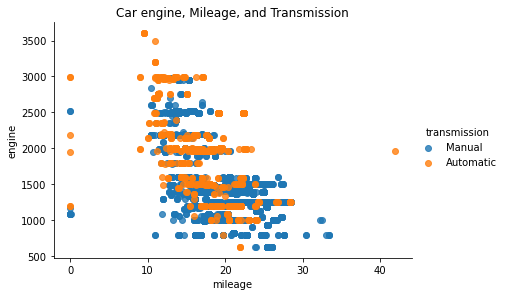

In [27]:
# Relationship between car enngine, mileage, and transmission
g = sb.FacetGrid(data = used_car, hue = 'transmission', 
                 hue_order = ['Manual','Automatic'],size= 4, aspect =1.5)
g = g.map(sb.regplot, 'mileage', 'engine', x_jitter = 0.04, fit_reg = False);
g.add_legend()
plt.xlabel('mileage')
plt.ylabel('engine');
plt.title("Car engine, Mileage, and Transmission");



The plots shows the relationship between three variables. It can be depicted that most mileage fall within the range of 18-20 and have an engine size between 1000-1500 and are mostly Manual type of transmission. 

### Correlations between 'mileage','engine','max_power',and 'selling_price'
#### Checking for correlations between four variables to know if we have a positive or negative correlations within the variable



In [28]:
#Correlations between 'mileage','engine','max_power',and 'selling_price'
used_auto = ['mileage','engine','max_power','selling_price']

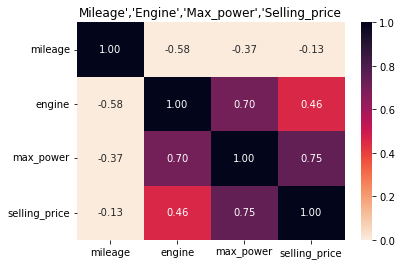

In [29]:
sb.heatmap(used_car[used_auto].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0);
plt.title("Mileage','Engine','Max_power','Selling_price");


The heatmap above shows we have a strong correlation the car max power and it engine size and also have a strong correlation between car engine and its selling price.

#### Talk about some of the relationships you observed in this part of the investigation. 

I extended my investigation of car enngine, mileage, and transmission and relationship shows that most mileage of 20km have a transmission populated by manual and an engine size of 1000-1500. Further investigation were done using heatmap to check at the correlation between Mileage','Engine','Max_power','Selling_price. From the exploration, we tend to have a strong positive correlation between max power and selling price as well as strong positive correlation between engine and max power. 

## Conclusions
After loading of dataset which was already cleaned, data wrangling took place where I checked the data structure and drop irrelevant columns. The dataset was about 7,906 and has 17 columns. From the exploratory phase, number of car used by city were determined and could be seen that Newyork city has the most numbers of car used. Car mileage were also determined and most mileage falls within 20. Generally, from the analysis it could be depicted that most cars transmission were manual and most fuel types were diesel. The most common used car was Maruti followed by Hyundai.

Further analysis were done using both the Bivariate and Multivariate plot type. Relationship between selling price and car mileage were obtained in order to know if their is a correlation between them. Also, car mileage per region was also determined alongside transmission by region abd car owner by region.Lastly, correlation between 'mileage','engine','max_power',and 'selling_price' were determined from the dataset which shows we have a strong correlation the car max power and it engine size and also have a strong correlation between car engine and its selling price.


